# 📊 Data Analysis Toolkit - Complete Tutorial

A comprehensive guide to all analysis capabilities with interactive Plotly visualizations.

**Contents:**
1. [Setup & Data Loading](#1-setup--data-loading)
2. [Statistical Analysis](#2-statistical-analysis) - Descriptive stats, correlations, outliers
3. [Machine Learning](#3-machine-learning) - Regression, classification, feature importance
4. [PCA & Dimensionality Reduction](#4-pca-analysis)
5. [Bayesian Analysis](#5-bayesian-analysis) - Posterior inference, credible intervals
6. [Uncertainty Quantification](#6-uncertainty-analysis) - Bootstrap CI, residual diagnostics
7. [Non-Linear Analysis](#7-non-linear-analysis) - Distance correlation, mutual information
8. [Time Series Analysis](#8-time-series-analysis) - Stationarity, ACF/PACF, signal processing
9. [Causality Analysis](#9-causality-analysis) - Granger causality, lead-lag
10. [Visualizations](#10-visualizations) - Interactive Plotly charts
11. [Neural Networks](#11-neural-networks) - MLP, LSTM, Autoencoder 🧠

---
## 1. Setup & Data Loading

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Plotly for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Enable Plotly in Jupyter Notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Import toolkit modules
import sys
sys.path.insert(0, '../src')

from data_toolkit import (
    DataLoader,
    StatisticalAnalysis,
    MLModels,
    BayesianAnalysis,
    UncertaintyAnalysis,
    NonLinearAnalysis,
    TimeSeriesAnalysis,
    CausalityAnalysis,
    VisualizationMethods
)

print('✅ All modules imported successfully!')

2025-12-12 20:59:08.573133: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 20:59:08.598246: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-12 20:59:09.654812: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


✅ All modules imported successfully!


### Load Your Data

You can load your own CSV/Excel file or use the sample data below:

In [2]:
# Option 1: Load your own data
# loader = DataLoader()
# loader.load_csv('your_data.csv')
# df = loader.df

# Option 2: Generate sample data with interesting properties
np.random.seed(42)
n = 300

# Time index for time series features
time = np.arange(n)

# Features with various relationships
x1 = np.sin(time / 20) + np.random.randn(n) * 0.3  # Periodic
x2 = np.cos(time / 15) + np.random.randn(n) * 0.2  # Periodic (different phase)
x3 = np.random.randn(n)  # Pure noise
x4 = x1 * 0.6 + np.random.randn(n) * 0.4  # Correlated with x1

# Target with non-linear relationship
target = 2.5 * x1 + 1.5 * x2**2 - 0.5 * x3 + np.random.randn(n) * 0.5

df = pd.DataFrame({
    'time': time,
    'feature_1': x1,
    'feature_2': x2,
    'feature_3': x3,
    'feature_4': x4,
    'target': target
})

# Define column groups
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4']
target_col = 'target'

print(f'📊 Data shape: {df.shape}')
print(f'📋 Features: {features}')
print(f'🎯 Target: {target_col}')
df.head()

📊 Data shape: (300, 6)
📋 Features: ['feature_1', 'feature_2', 'feature_3', 'feature_4']
🎯 Target: target


,time,feature_1,feature_2,feature_3,feature_4,target
0,0,0.149014,0.834201,0.756989,0.236878,1.100491
1,1,0.008500,0.885742,-0.922165,-0.152236,1.444439
2,2,0.294140,1.140583,0.869606,0.187982,2.313090
3,3,0.606347,1.102141,1.355638,0.875189,2.931769
4,4,0.128423,0.960474,0.413435,0.153494,1.522537


In [3]:
# Initialize all analysis modules with our data
stats = StatisticalAnalysis(df)
ml = MLModels(df)
bayesian = BayesianAnalysis(df)
uncertainty = UncertaintyAnalysis(df)
nonlinear = NonLinearAnalysis(df)
ts = TimeSeriesAnalysis(df)
causality = CausalityAnalysis(df)

print('✅ All analysis modules initialized!')

✅ All analysis modules initialized!


---
## 2. Statistical Analysis

Explore data distributions, correlations, and detect outliers.

In [4]:
# Descriptive statistics
print('📊 DESCRIPTIVE STATISTICS')
print('=' * 50)
desc = stats.descriptive_stats(features + [target_col])
desc

📊 DESCRIPTIVE STATISTICS


,feature_1,feature_2,feature_3,feature_4,target
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.114540,0.042319,0.082194,0.108073,1.156561
std,0.754973,0.759670,0.996676,0.590111,2.098010
min,-1.558699,-1.412611,-2.696887,-1.413748,-3.889507
25%,-0.542204,-0.674772,-0.571475,-0.285247,-0.447918
50%,0.241208,0.116522,0.042741,0.141885,1.338246
75%,0.750904,0.745418,0.711470,0.530443,2.725058
max,1.637937,1.453992,2.632382,1.685743,6.695535
skewness,-0.233474,-0.118498,0.122355,-0.089465,-0.152309
kurtosis,-1.028746,-1.281735,-0.173360,-0.382793,-0.695243


In [5]:
# Correlation matrix with interactive heatmap
corr = stats.correlation_matrix(features + [target_col])

fig = px.imshow(corr, text_auto='.2f', color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1, title='📈 Correlation Heatmap',
                labels=dict(color="Correlation"))
fig.update_layout(width=600, height=500)
fig

In [6]:
# Outlier detection (IQR method)
print('🔍 OUTLIER DETECTION (IQR Method)')
print('=' * 50)
outliers = stats.outlier_detection(features, method='iqr')

for col, info in outliers.items():
    status = '⚠️' if info['n_outliers'] > 0 else '✅'
    print(f"{status} {col}: {info['n_outliers']} outliers ({info['percentage']:.1f}%)")
    if info['n_outliers'] > 0:
        print(f"   Bounds: [{info['lower_bound']:.3f}, {info['upper_bound']:.3f}]")

🔍 OUTLIER DETECTION (IQR Method)
✅ feature_1: 0 outliers (0.0%)
✅ feature_2: 0 outliers (0.0%)
⚠️ feature_3: 2 outliers (0.7%)
   Bounds: [-2.496, 2.636]
✅ feature_4: 0 outliers (0.0%)


In [7]:
# Outlier visualization with ACTUAL detected outliers highlighted
n_features = len(features)
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=[f"{col}" for col in features])

for idx, col in enumerate(features):
    row = idx // 2 + 1
    col_pos = idx % 2 + 1

    info = outliers.get(col, {})
    outlier_indices = info.get('outlier_indices', [])

    # Create mask for outliers
    is_outlier = df.index.isin(outlier_indices)

    # Plot normal points (blue)
    fig.add_trace(
        go.Scatter(
            x=df.index[~is_outlier].tolist(),
            y=df.loc[~is_outlier, col].tolist(),
            mode='markers',
            marker=dict(color='steelblue', size=5, opacity=0.6),
            name='Normal' if idx == 0 else None,
            showlegend=(idx == 0)
        ),
        row=row, col=col_pos
    )

    # Plot outlier points (red X)
    if is_outlier.any():
        fig.add_trace(
            go.Scatter(
                x=df.index[is_outlier].tolist(),
                y=df.loc[is_outlier, col].tolist(),
                mode='markers',
                marker=dict(color='red', size=10, symbol='x'),
                name='Outliers' if idx == 0 else None,
                showlegend=(idx == 0)
            ),
            row=row, col=col_pos
        )

    # Add IQR bounds as horizontal lines
    if 'lower_bound' in info:
        fig.add_hline(y=info['lower_bound'], line_dash='dash', line_color='orange', row=row, col=col_pos)
    if 'upper_bound' in info:
        fig.add_hline(y=info['upper_bound'], line_dash='dash', line_color='orange', row=row, col=col_pos)

fig.update_layout(
    title='🔍 Outlier Detection: Blue=Normal, Red X=Outliers, Orange=IQR Bounds',
    height=600,
    showlegend=True
)
fig

---
## 3. Machine Learning

Train regression models, evaluate performance, and analyze feature importance.

In [8]:
# Train Linear Regression
print('🤖 LINEAR REGRESSION')
print('=' * 50)
lr_results = ml.train_model(features, target_col, 'Linear Regression', test_size=0.2)

print(f"R² Score: {lr_results['r2']:.4f}")
print(f"RMSE: {lr_results['rmse']:.4f}")
print(f"\nCoefficients:")
for feat, coef in lr_results['coefficients'].items():
    print(f"  {feat}: {coef:+.4f}")

🤖 LINEAR REGRESSION
R² Score: 0.7903
RMSE: 0.9080

Coefficients:
  feature_1: +2.6555
  feature_2: +0.0750
  feature_3: -0.4829
  feature_4: -0.1764


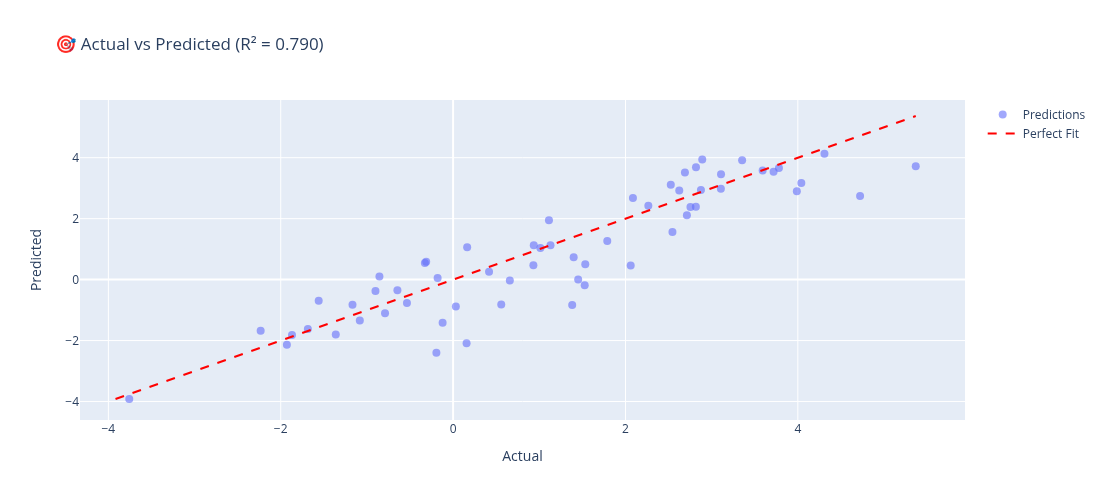

In [9]:
# Actual vs Predicted plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=lr_results['y_test'], y=lr_results['predictions'],
    mode='markers', name='Predictions',
    marker=dict(opacity=0.6, size=8)
))

# Perfect prediction line
min_val = min(lr_results['y_test'].min(), lr_results['predictions'].min())
max_val = max(lr_results['y_test'].max(), lr_results['predictions'].max())
fig.add_trace(go.Scatter(
    x=[min_val, max_val], y=[min_val, max_val],
    mode='lines', name='Perfect Fit',
    line=dict(dash='dash', color='red', width=2)
))

fig.update_layout(
    title=f'🎯 Actual vs Predicted (R² = {lr_results["r2"]:.3f})',
    xaxis_title='Actual', yaxis_title='Predicted',
    width=600, height=500
)
fig

In [10]:
# Cross-validation for robust evaluation
print('🔄 CROSS-VALIDATION (5-Fold)')
print('=' * 50)
cv_results = ml.cross_validation(features, target_col, cv=5, model_name='Linear Regression')

print(f"Individual fold scores: {[f'{s:.3f}' for s in cv_results['scores']]}")
print(f"Mean R²: {cv_results['mean']:.4f} ± {cv_results['std']:.4f}")

🔄 CROSS-VALIDATION (5-Fold)
Individual fold scores: ['0.591', '0.418', '0.573', '0.748', '0.770']
Mean R²: 0.6199 ± 0.1287


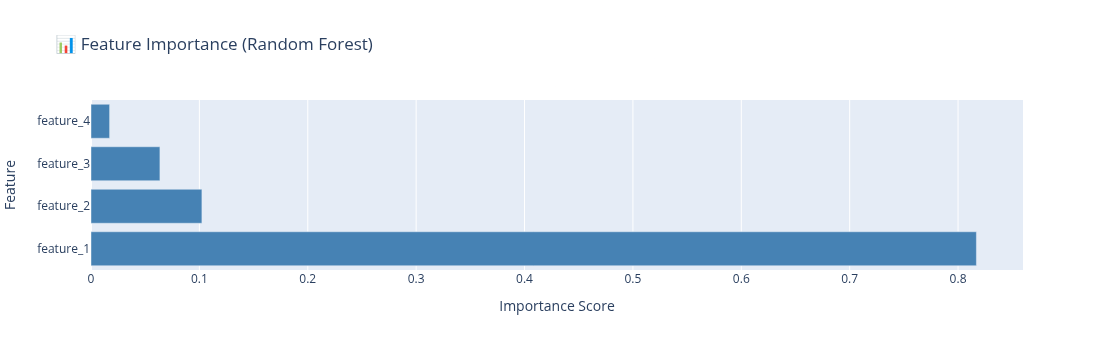

In [11]:
# Feature importance using Random Forest
importance = ml.feature_importance(features, target_col)

fig = go.Figure(data=[
    go.Bar(
        y=list(importance.keys()),
        x=list(importance.values()),
        orientation='h',
        marker_color='steelblue'
    )
])
fig.update_layout(
    title='📊 Feature Importance (Random Forest)',
    xaxis_title='Importance Score',
    yaxis_title='Feature',
    height=350
)
fig

---
## 4. PCA Analysis

Dimensionality reduction and variance explanation.

🔬 PCA ANALYSIS
PC1: 43.7% variance
PC2: 27.3% variance
PC3: 22.3% variance
PC4: 6.7% variance

Components needed for 95% variance: 4


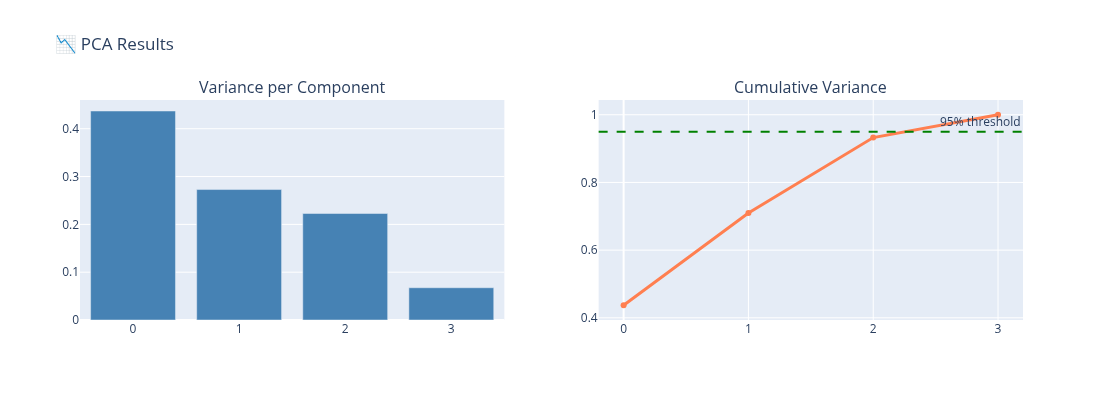

In [12]:
# PCA Analysis
pca_results = ml.pca_analysis(features)

print('🔬 PCA ANALYSIS')
print('=' * 50)
for i, var in enumerate(pca_results['explained_variance'], 1):
    print(f"PC{i}: {var*100:.1f}% variance")
print(f"\nComponents needed for 95% variance: {pca_results['n_components_selected']}")

# Scree plot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Variance per Component', 'Cumulative Variance'))

fig.add_trace(go.Bar(
    y=pca_results['explained_variance'],
    name='Individual',
    marker_color='steelblue'
), row=1, col=1)

fig.add_trace(go.Scatter(
    y=pca_results['cumulative_variance'],
    mode='lines+markers',
    name='Cumulative',
    line=dict(color='coral', width=3)
), row=1, col=2)

fig.add_hline(y=0.95, line_dash='dash', line_color='green', row=1, col=2,
              annotation_text='95% threshold')

fig.update_layout(title='📉 PCA Results', showlegend=False, height=400)
fig

---
## 5. Bayesian Analysis

Posterior distributions and credible intervals for coefficient uncertainty.

In [13]:
# Bayesian regression with credible intervals
print('🎲 BAYESIAN REGRESSION')
print('=' * 50)
bayes_results = bayesian.bayesian_regression(features, target_col)

print('Posterior Estimates (95% Credible Intervals):')
for i, feat in enumerate(bayes_results['features']):
    mean = bayes_results['posterior_mean'][i]
    ci_low = bayes_results['credible_intervals_lower'][i]
    ci_high = bayes_results['credible_intervals_upper'][i]
    print(f"  {feat}: {mean:+.4f}  [{ci_low:+.4f}, {ci_high:+.4f}]")

🎲 BAYESIAN REGRESSION
Posterior Estimates (95% Credible Intervals):
  Intercept: +0.9193  [+0.8024, +1.0288]
  feature_1: +2.5726  [+2.3537, +2.7926]
  feature_2: -0.0024  [-0.1540, +0.1531]
  feature_3: -0.4863  [-0.5936, -0.3656]
  feature_4: -0.1604  [-0.4355, +0.1282]


In [14]:
# Credible intervals for predictions
ci_results = bayesian.credible_intervals(features, target_col, confidence=0.95)

print('📊 PREDICTION CREDIBLE INTERVALS')
print('=' * 50)
print(f"Empirical Coverage: {ci_results['coverage']*100:.1f}%")
print(f"Mean CI Width: {ci_results['mean_ci_width']:.4f}")
print(f"\n💡 Coverage should be close to 95% for well-calibrated intervals")

📊 PREDICTION CREDIBLE INTERVALS
Empirical Coverage: 95.3%
Mean CI Width: 3.3974

💡 Coverage should be close to 95% for well-calibrated intervals


---
## 6. Uncertainty Analysis

Bootstrap confidence intervals and residual diagnostics.

In [15]:
# Bootstrap confidence intervals (non-parametric)
print('🔄 BOOTSTRAP CONFIDENCE INTERVALS')
print('=' * 50)
boot_results = uncertainty.bootstrap_ci(features, target_col, n_bootstrap=500, confidence=0.95)

boot_df = pd.DataFrame({
    'Feature': boot_results['features'],
    'Mean': boot_results['mean_coefs'],
    'Std Error': boot_results['std_coefs'],
    'CI Lower (2.5%)': boot_results['ci_lower'],
    'CI Upper (97.5%)': boot_results['ci_upper']
})
boot_df.round(4)

🔄 BOOTSTRAP CONFIDENCE INTERVALS


,Feature,Mean,Std Error,CI Lower (2.5%),CI Upper (97.5%)
0,feature_1,2.5626,0.0919,2.3857,2.7601
1,feature_2,-0.0018,0.0787,-0.1456,0.1758
2,feature_3,-0.4874,0.0521,-0.5910,-0.3860
3,feature_4,-0.1510,0.1264,-0.4007,0.0848


In [16]:
# Residual diagnostics
print('🔬 RESIDUAL ANALYSIS')
print('=' * 50)
resid_results = uncertainty.residual_analysis(features, target_col)

print(f"Durbin-Watson: {resid_results['durbin_watson']:.3f} (≈2 = no autocorrelation)")
print(f"Shapiro-Wilk p-value: {resid_results['shapiro_pvalue']:.4f} (>0.05 = normal)")
print(f"\n✅ Autocorrelation OK: {resid_results['no_autocorrelation']}")
print(f"✅ Normality OK: {resid_results['is_normal']}")

🔬 RESIDUAL ANALYSIS
Durbin-Watson: 1.175 (≈2 = no autocorrelation)
Shapiro-Wilk p-value: 0.0002 (>0.05 = normal)

✅ Autocorrelation OK: False
✅ Normality OK: False


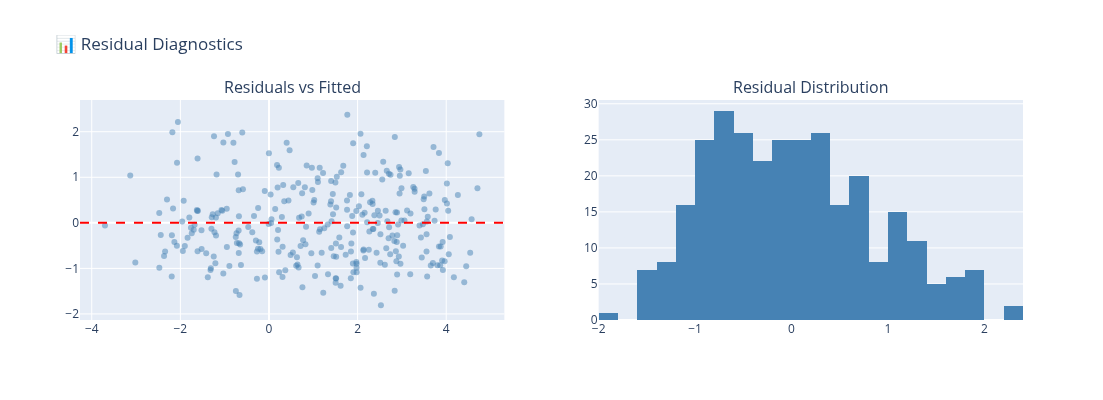

In [17]:
# Residual diagnostic plots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Residuals vs Fitted', 'Residual Distribution'))

# Scatter plot
fig.add_trace(go.Scatter(
    x=resid_results['y_pred'],
    y=resid_results['residuals'],
    mode='markers',
    marker=dict(opacity=0.5, color='steelblue')
), row=1, col=1)
fig.add_hline(y=0, line_dash='dash', line_color='red', row=1, col=1)

# Histogram
fig.add_trace(go.Histogram(
    x=resid_results['residuals'],
    nbinsx=30,
    marker_color='steelblue'
), row=1, col=2)

fig.update_layout(title='📊 Residual Diagnostics', showlegend=False, height=400)
fig

---
## 7. Non-Linear Analysis

Detect non-linear relationships that Pearson correlation misses.

In [18]:
# Distance correlation vs Pearson correlation
# Distance correlation captures non-linear relationships!
print('🔗 LINEAR vs NON-LINEAR CORRELATION')
print('=' * 50)

dist_corr = nonlinear.distance_correlation(features, target_col)
pearson_corr = {f: abs(df[f].corr(df[target_col])) for f in features}

comparison_df = pd.DataFrame({
    'Feature': features,
    '|Pearson|': [pearson_corr[f] for f in features],
    'Distance Corr': [dist_corr[f] for f in features]
})
comparison_df['Gap (Non-linearity)'] = comparison_df['Distance Corr'] - comparison_df['|Pearson|']
print(comparison_df.round(4))
print("\n💡 Large positive gap suggests non-linear relationship!")

🔗 LINEAR vs NON-LINEAR CORRELATION
     Feature  |Pearson|  Distance Corr  Gap (Non-linearity)
0  feature_1     0.8827         0.8717              -0.0110
1  feature_2     0.0887         0.1795               0.0908
2  feature_3     0.1912         0.1779              -0.0133
3  feature_4     0.6243         0.6173              -0.0070

💡 Large positive gap suggests non-linear relationship!


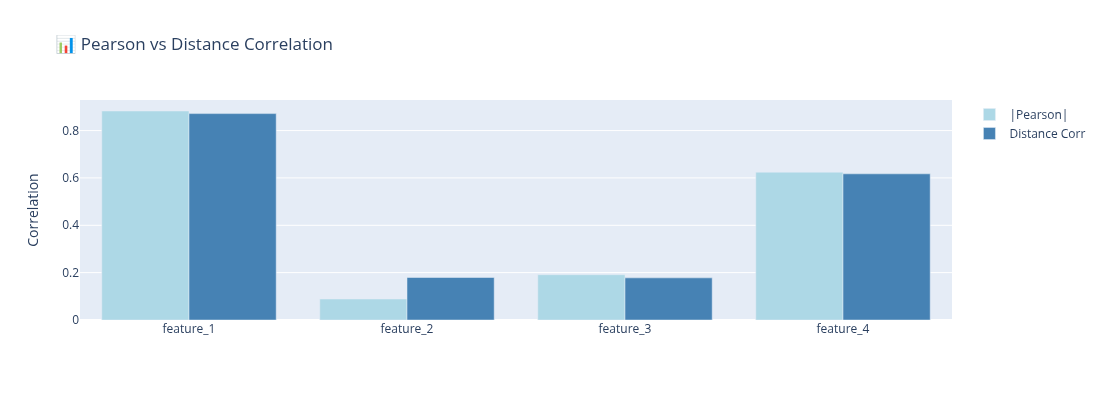

In [19]:
# Visual comparison
fig = go.Figure(data=[
    go.Bar(name='|Pearson|', x=features, y=comparison_df['|Pearson|'], marker_color='lightblue'),
    go.Bar(name='Distance Corr', x=features, y=comparison_df['Distance Corr'], marker_color='steelblue')
])
fig.update_layout(
    barmode='group',
    title='📊 Pearson vs Distance Correlation',
    yaxis_title='Correlation',
    height=400
)
fig

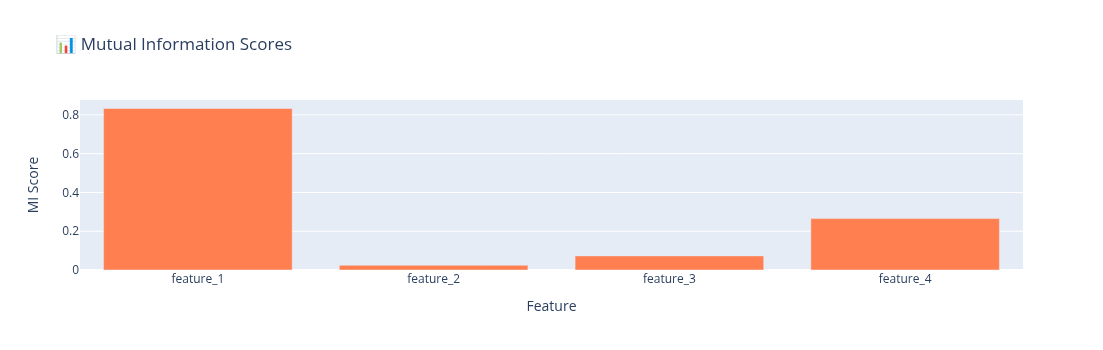

In [20]:
# Mutual information (model-free dependency measure)
mi = nonlinear.mutual_information(features, target_col)

fig = go.Figure(data=[
    go.Bar(x=list(mi.keys()), y=list(mi.values()), marker_color='coral')
])
fig.update_layout(
    title='📊 Mutual Information Scores',
    yaxis_title='MI Score',
    xaxis_title='Feature',
    height=350
)
fig

---
## 8. Time Series Analysis

Stationarity tests, autocorrelation, and signal processing.

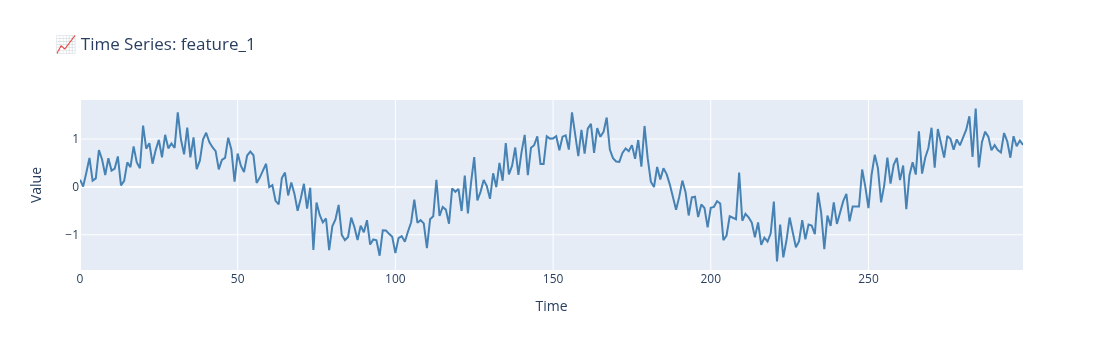

In [21]:
# Our sample data already has time series characteristics
# Let's visualize feature_1 (has sin pattern) as a time series

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['time'], y=df['feature_1'],
    mode='lines', name='feature_1',
    line=dict(color='steelblue')
))
fig.update_layout(
    title='📈 Time Series: feature_1',
    xaxis_title='Time', yaxis_title='Value',
    height=350
)
fig

In [22]:
# Stationarity test (Augmented Dickey-Fuller)
print('📊 STATIONARITY TEST (ADF)')
print('=' * 50)
adf_results = ts.stationarity_test(['feature_1', 'feature_3'])

for col, data in adf_results.items():
    status = '✅ Stationary' if data['is_stationary'] else '❌ Non-stationary'
    print(f"{col}:")
    print(f"  ADF Statistic: {data['adf_statistic']:.4f}")
    print(f"  p-value: {data['p_value']:.4f}")
    print(f"  Result: {status}")

📊 STATIONARITY TEST (ADF)
feature_1:
  ADF Statistic: -2.3025
  p-value: 0.1712
  Result: ❌ Non-stationary
feature_3:
  ADF Statistic: -17.3916
  p-value: 0.0000
  Result: ✅ Stationary


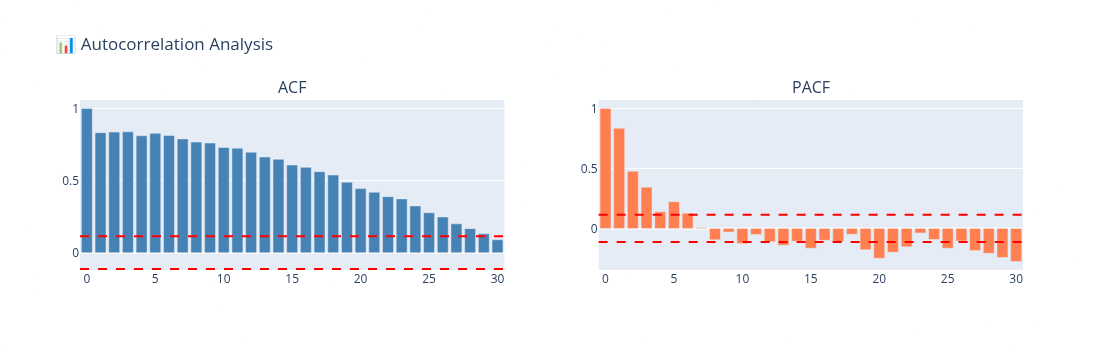

In [23]:
# ACF and PACF (Autocorrelation)
acf_results = ts.acf_analysis('feature_1', lags=30)
pacf_results = ts.pacf_analysis('feature_1', lags=30)

fig = make_subplots(rows=1, cols=2, subplot_titles=('ACF', 'PACF'))

# ACF
fig.add_trace(go.Bar(y=acf_results['acf'], marker_color='steelblue'), row=1, col=1)
fig.add_hline(y=acf_results['conf_int_upper'], line_dash='dash', line_color='red', row=1, col=1)
fig.add_hline(y=acf_results['conf_int_lower'], line_dash='dash', line_color='red', row=1, col=1)

# PACF
fig.add_trace(go.Bar(y=pacf_results['pacf'], marker_color='coral'), row=1, col=2)
fig.add_hline(y=pacf_results['conf_int_upper'], line_dash='dash', line_color='red', row=1, col=2)
fig.add_hline(y=pacf_results['conf_int_lower'], line_dash='dash', line_color='red', row=1, col=2)

fig.update_layout(title='📊 Autocorrelation Analysis', showlegend=False, height=350)
fig

---
## 9. Causality Analysis

Determine if one variable Granger-causes another and find lead-lag relationships.

### What is Lead-Lag Analysis?
Lead-lag analysis measures how the correlation between two variables changes when one is shifted in time:
- **Negative lag**: Feature leads target (feature predicts future target)
- **Positive lag**: Target leads feature (target predicts future feature)
- **Lag = 0**: Contemporaneous relationship (no time delay)

**Important**: Our sample data has NO true lead-lag relationship because `target` is computed instantaneously from the features. To see lead-lag in action, we'll create a signal with an actual time delay.

In [24]:
# Granger causality test
# Tests if past values of X help predict Y beyond past values of Y alone
print('🔮 GRANGER CAUSALITY TEST')
print('=' * 50)
print('Testing: Does feature_1 Granger-cause target?\n')

granger_results = causality.granger_causality(['feature_1'], target_col, max_lag=5)

for feat, lag_data in granger_results.items():
    print(f"{feat} → {target_col}:")
    for lag, data in lag_data.items():
        if isinstance(data, dict) and 'ssr_ftest_pvalue' in data:
            sig = '✅ significant' if data.get('is_significant', False) else '❌ not significant'
            print(f"  Lag {lag}: p-value = {data['ssr_ftest_pvalue']:.4f} {sig}")

🔮 GRANGER CAUSALITY TEST
Testing: Does feature_1 Granger-cause target?

feature_1 → target:
  Lag 1: p-value = 0.0000 ✅ significant
  Lag 2: p-value = 0.0001 ✅ significant
  Lag 3: p-value = 0.0004 ✅ significant
  Lag 4: p-value = 0.0019 ✅ significant
  Lag 5: p-value = 0.0135 ✅ significant


⏱️ LEAD-LAG ANALYSIS
signal:
  Best lag: 5 (expected: -5, since signal leads signal_delayed)
  Max correlation: 1.0000
  Direction: target leads



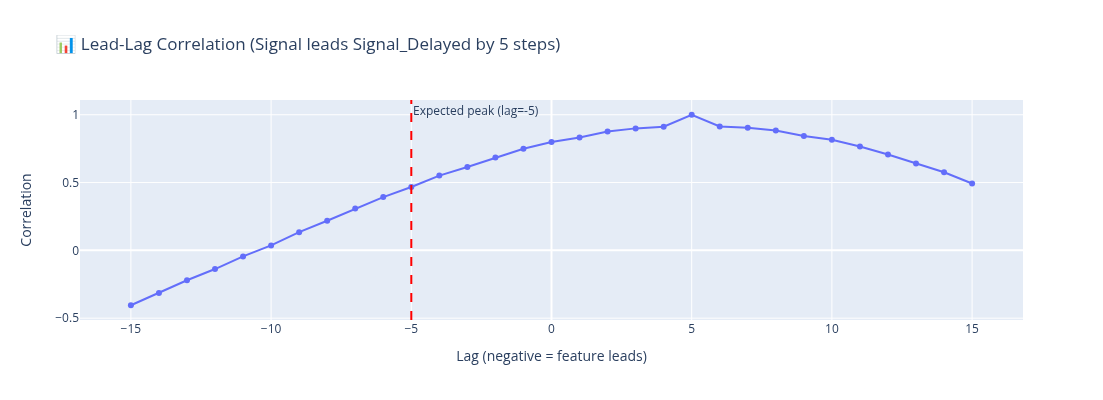

In [25]:
# Lead-lag analysis with REAL lead-lag data
# Create a signal where signal_delayed = signal shifted by 5 time steps
print('⏱️ LEAD-LAG ANALYSIS')
print('=' * 50)

# Create data with actual lead-lag relationship
np.random.seed(42)
n = 300
signal = np.sin(np.arange(n) / 10) + np.random.randn(n) * 0.2
lag_amount = 5
signal_delayed = np.roll(signal, lag_amount)  # Shift signal by 5 steps

# Add to dataframe temporarily for analysis
df_leadlag = pd.DataFrame({
    'signal': signal,
    'signal_delayed': signal_delayed
})
causality_demo = CausalityAnalysis(df_leadlag)

# Analyze - should show peak at lag = 5 (signal leads signal_delayed by 5 steps)
lead_lag_results = causality_demo.lead_lag_analysis(['signal'], 'signal_delayed', max_lag=15)

for feat, data in lead_lag_results.items():
    direction = "feature leads" if data['feature_leads'] else "target leads" if data['target_leads'] else "no clear lead"
    print(f"{feat}:")
    print(f"  Best lag: {data['best_lag']} (expected: -5, since signal leads signal_delayed)")
    print(f"  Max correlation: {data['best_correlation']:.4f}")
    print(f"  Direction: {direction}\n")

# Visualize - should show clear peak
fig = go.Figure()
for feat, data in lead_lag_results.items():
    fig.add_trace(go.Scatter(
        x=data['lags'], y=data['correlations'],
        mode='lines+markers', name=feat,
        line=dict(width=2)
    ))

# Mark the expected peak
fig.add_vline(x=-5, line_dash='dash', line_color='red',
              annotation_text='Expected peak (lag=-5)')

fig.update_layout(
    title='📊 Lead-Lag Correlation (Signal leads Signal_Delayed by 5 steps)',
    xaxis_title='Lag (negative = feature leads)',
    yaxis_title='Correlation',
    height=400
)
fig

⏱️ ORIGINAL DATA: Lead-Lag Analysis
Note: Our sample data has NO time delay - target is computed instantaneously from features.
This means the correlation is the SAME at all lags (flat line).

feature_1: Best lag = 0, Max correlation = 0.8827
feature_4: Best lag = 0, Max correlation = 0.6243


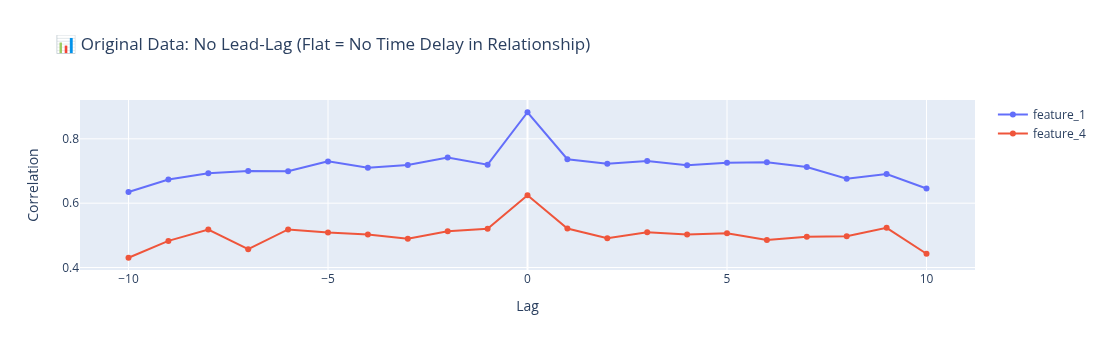

In [26]:
# Original data: NO lead-lag relationship (flat line is CORRECT)
print('⏱️ ORIGINAL DATA: Lead-Lag Analysis')
print('=' * 50)
print('Note: Our sample data has NO time delay - target is computed instantaneously from features.')
print('This means the correlation is the SAME at all lags (flat line).\n')

original_leadlag = causality.lead_lag_analysis(['feature_1', 'feature_4'], target_col, max_lag=10)

for feat, data in original_leadlag.items():
    print(f"{feat}: Best lag = {data['best_lag']}, Max correlation = {data['best_correlation']:.4f}")

# This will be flat - which is correct!
fig = go.Figure()
for feat, data in original_leadlag.items():
    fig.add_trace(go.Scatter(
        x=data['lags'], y=data['correlations'],
        mode='lines+markers', name=feat
    ))

fig.update_layout(
    title='📊 Original Data: No Lead-Lag (Flat = No Time Delay in Relationship)',
    xaxis_title='Lag', yaxis_title='Correlation',
    height=350
)
fig

---
## 10. Visualizations

Interactive Plotly visualizations for data exploration.

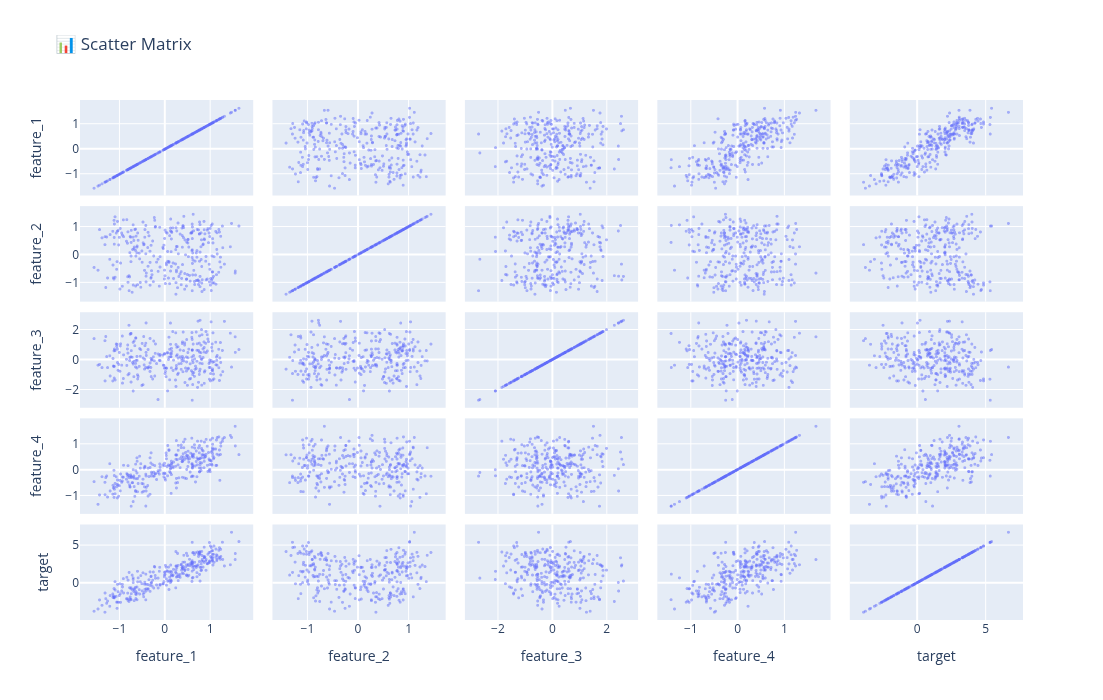

In [27]:
# Scatter matrix (pairwise relationships)
fig = px.scatter_matrix(
    df[features + [target_col]],
    dimensions=features + [target_col],
    title='📊 Scatter Matrix',
    height=700, width=800
)
fig.update_traces(diagonal_visible=True, marker=dict(size=3, opacity=0.5))
fig

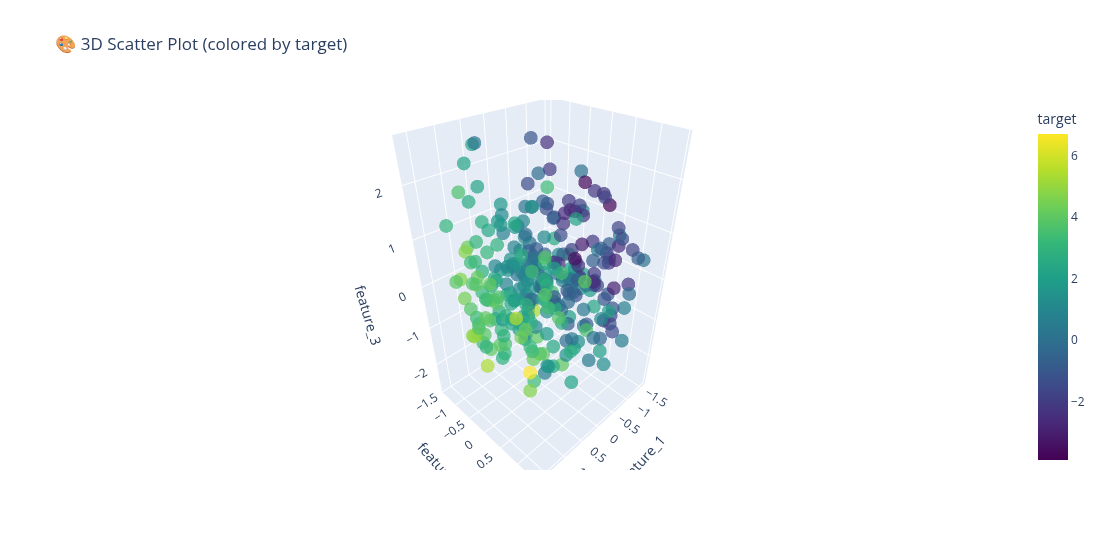

In [28]:
# 3D Scatter plot
fig = px.scatter_3d(
    df, x='feature_1', y='feature_2', z='feature_3',
    color='target',
    title='🎨 3D Scatter Plot (colored by target)',
    color_continuous_scale='Viridis',
    opacity=0.7
)
fig.update_layout(height=550)
fig

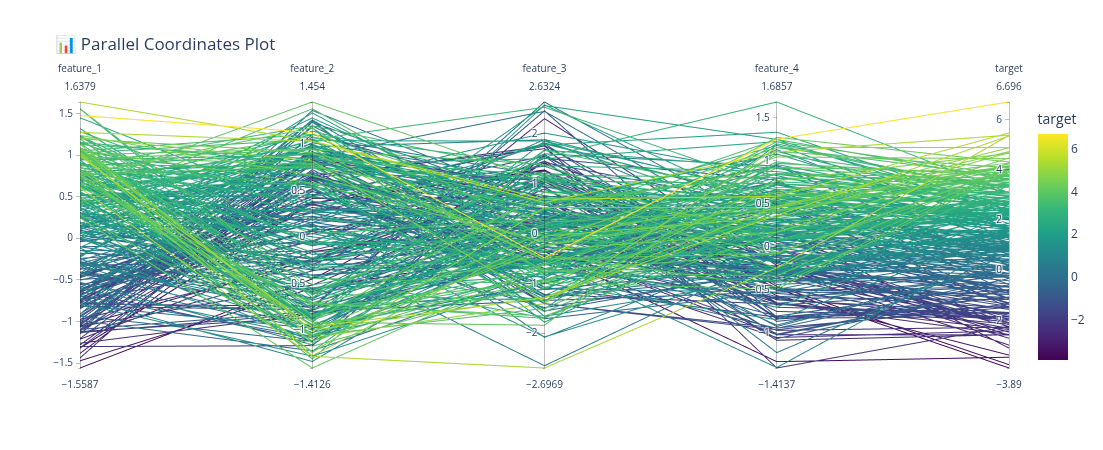

In [29]:
# Parallel coordinates (multivariate visualization)
fig = px.parallel_coordinates(
    df[features + [target_col]],
    color='target',
    color_continuous_scale='Viridis',
    title='📊 Parallel Coordinates Plot'
)
fig.update_layout(height=450)
fig

---
## 11. Neural Networks 🧠

Deep learning models for regression, classification, forecasting, and anomaly detection.

**Available Models:**
- **MLP Regressor** - Multi-layer perceptron for regression tasks
- **MLP Classifier** - Multi-layer perceptron for classification
- **LSTM Forecast** - Long Short-Term Memory for time series forecasting
- **Autoencoder Anomaly Detection** - Detect anomalies via reconstruction error

> ⚠️ **Note**: Requires TensorFlow. Install with: `pip install tensorflow`

In [30]:
# Check if TensorFlow is available and import Neural Networks module
try:
    from data_toolkit import NeuralNetworkModels
    from data_toolkit import NEURAL_NETWORKS_AVAILABLE
    print("✅ Neural Networks module available!")
    print(f"   TensorFlow status: {'Installed' if NEURAL_NETWORKS_AVAILABLE else 'Not installed'}")
except ImportError:
    NEURAL_NETWORKS_AVAILABLE = False
    print("⚠️ TensorFlow not installed. Neural networks unavailable.")
    print("   Install with: pip install tensorflow")

✅ Neural Networks module available!
   TensorFlow status: Installed


### 11.1 MLP Regressor

Train a Multi-Layer Perceptron for regression:

In [31]:
if NEURAL_NETWORKS_AVAILABLE:
    # Initialize neural networks module
    nn = NeuralNetworkModels(df)

    # Train MLP Regressor
    mlp_results = nn.mlp_regressor(
        features=features,      # Feature columns
        target=target_col,      # Target column
        hidden_layers=[64, 32], # Two hidden layers
        epochs=50,              # Training epochs
        batch_size=32,          # Batch size
        validation_split=0.2   # 20% validation
    )

    print("MLP Regressor Results:")
    print(f"  MSE: {mlp_results['mse']:.4f}")
    print(f"  MAE: {mlp_results['mae']:.4f}")
    print(f"  R² Score: {mlp_results['r2']:.4f}")

    # Plot training history
    if 'history' in mlp_results:
        fig = go.Figure()
        fig.add_trace(go.Scatter(y=mlp_results['history']['loss'], name='Training Loss'))
        if 'val_loss' in mlp_results['history']:
            fig.add_trace(go.Scatter(y=mlp_results['history']['val_loss'], name='Validation Loss'))
        fig.update_layout(
            title='🧠 MLP Regressor Training History',
            xaxis_title='Epoch',
            yaxis_title='Loss (MSE)',
            height=400
        )
        fig.show()
else:
    print("⚠️ Skipping MLP Regressor - TensorFlow not installed")

2025-12-12 20:59:46.041588: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


MLP Regressor Results:
  MSE: 0.9406
  MAE: 0.7767
  R² Score: 0.7607


### 11.2 LSTM Time Series Forecast

LSTM (Long Short-Term Memory) networks excel at learning sequential patterns in time series:

In [32]:
if NEURAL_NETWORKS_AVAILABLE:
    # Train LSTM for time series forecasting
    lstm_results = nn.lstm_forecast(
        column='feature_1',     # Column to forecast
        lookback=10,            # Use 10 previous time steps
        forecast_horizon=5,     # Predict 5 steps ahead
        epochs=50,
        batch_size=16
    )

    print("LSTM Forecast Results:")
    print(f"  Test MSE: {lstm_results['test_mse']:.4f}")
    print(f"  Test MAE: {lstm_results['test_mae']:.4f}")
    print(f"  Forecast (next 5 steps): {lstm_results['forecast'][:5]}")

    # Plot actual vs predicted with forecast
    fig = go.Figure()

    # Actual values
    fig.add_trace(go.Scatter(
        y=lstm_results['actual'],
        name='Actual',
        line=dict(color='blue')
    ))

    # Predicted values
    fig.add_trace(go.Scatter(
        y=lstm_results['predicted'],
        name='Predicted',
        line=dict(color='green')
    ))

    # Future forecast
    forecast = lstm_results['forecast']
    forecast_x = list(range(len(lstm_results['actual']), len(lstm_results['actual']) + len(forecast)))
    fig.add_trace(go.Scatter(
        x=forecast_x,
        y=forecast,
        name='Future Forecast',
        line=dict(color='red', dash='dash'),
        mode='lines+markers'
    ))

    fig.update_layout(
        title='📈 LSTM Time Series Forecast',
        xaxis_title='Time Step',
        yaxis_title='Value',
        height=450
    )
    fig.show()
else:
    print("⚠️ Skipping LSTM Forecast - TensorFlow not installed")

TypeError: NeuralNetworkModels.lstm_forecast() got an unexpected keyword argument 'lookback'

### 11.3 Autoencoder Anomaly Detection

Autoencoders learn to compress and reconstruct data. Anomalies have high reconstruction error:

In [33]:
if NEURAL_NETWORKS_AVAILABLE:
    # Train autoencoder for anomaly detection
    ae_results = nn.autoencoder_anomaly_detection(
        features=features,      # Features to analyze
        encoding_dim=8,         # Compression dimension (bottleneck)
        epochs=50,
        batch_size=32,
        contamination=0.05      # Expected 5% anomaly rate
    )

    print("Autoencoder Anomaly Detection Results:")
    print(f"  Threshold: {ae_results['threshold']:.6f}")
    print(f"  Anomalies Found: {ae_results['n_anomalies']} / {ae_results['total_samples']}")
    print(f"  Anomaly Rate: {100*ae_results['n_anomalies']/ae_results['total_samples']:.2f}%")

    # Plot reconstruction errors
    fig = go.Figure()

    reconstruction_errors = ae_results['reconstruction_errors']
    threshold = ae_results['threshold']
    anomaly_idx = ae_results['anomaly_indices']

    # All points
    fig.add_trace(go.Scatter(
        y=reconstruction_errors,
        mode='lines',
        name='Reconstruction Error',
        line=dict(color='blue', width=1)
    ))

    # Threshold line
    fig.add_hline(
        y=threshold,
        line_dash="dash",
        line_color="red",
        annotation_text=f"Threshold ({threshold:.4f})"
    )

    # Highlight anomalies
    if len(anomaly_idx) > 0:
        fig.add_trace(go.Scatter(
            x=anomaly_idx,
            y=[reconstruction_errors[i] for i in anomaly_idx],
            mode='markers',
            name='Anomalies',
            marker=dict(color='red', size=10, symbol='x')
        ))

    fig.update_layout(
        title='🚨 Autoencoder Anomaly Detection',
        xaxis_title='Sample Index',
        yaxis_title='Reconstruction Error',
        height=450
    )
    fig.show()
else:
    print("⚠️ Skipping Autoencoder - TensorFlow not installed")

Autoencoder Anomaly Detection Results:
  Threshold: 1.601583


KeyError: 'total_samples'

---
## 📚 Summary

This tutorial demonstrated the complete capabilities of the Data Analysis Toolkit:

| Module | Key Methods |
|--------|-------------|
| **Statistical Analysis** | `descriptive_stats()`, `correlation_matrix()`, `outlier_detection()` |
| **Machine Learning** | `train_model()`, `cross_validation()`, `feature_importance()`, `pca_analysis()` |
| **Neural Networks** 🧠 | `mlp_regressor()`, `mlp_classifier()`, `lstm_forecast()`, `autoencoder_anomaly_detection()` |
| **Bayesian Analysis** | `bayesian_regression()`, `credible_intervals()` |
| **Uncertainty** | `bootstrap_ci()`, `residual_analysis()` |
| **Non-Linear** | `distance_correlation()`, `mutual_information()` |
| **Time Series** | `stationarity_test()`, `acf_analysis()`, `pacf_analysis()` |
| **Causality** | `granger_causality()`, `lead_lag_analysis()` |

### API Pattern
All modules follow the same pattern:
```python
# Initialize with DataFrame
analyzer = ModuleName(df)

# Call analysis methods
results = analyzer.method(features, target, **params)
```

### Neural Networks Usage
```python
from data_toolkit import NeuralNetworkModels

nn = NeuralNetworkModels(df)

# MLP Regressor
results = nn.mlp_regressor(features, target, hidden_layers=[64, 32], epochs=100)

# LSTM Forecast  
results = nn.lstm_forecast(column='value', lookback=10, forecast_horizon=5)

# Autoencoder Anomaly Detection
results = nn.autoencoder_anomaly_detection(features, encoding_dim=8, contamination=0.05)
```

### Next Steps
- **Streamlit App**: Run `streamlit run src/data_toolkit/streamlit_app.py` for interactive GUI
- **Tkinter GUI**: Run `python run.py` for desktop application
- **Signal Analysis**: Use `TimeSeriesAnalysis` for FFT, CWT, DWT wavelets
- **Rust Acceleration**: Build rust_extensions for 10-100x speedup on large data